<h1 style="text-align: center;" markdown="1">TP2: Ensamble FINAL</h1>
![](../data/icon_properati-data.png)

Se entrenaran varios algoritmos y se iran combinando en este mismo notebook.

In [1]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%pylab inline

# modules
import knn as knnlibrary

Populating the interactive namespace from numpy and matplotlib


/opt/conda/lib/python3.5/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


## Obtener y limpiar dataset

In [2]:
from time import time
# calculo el tiempo que tarda el notebook
start_notebook_time = time()

In [3]:
properties =knnlibrary.get_dataset()
properties.head()

,id,created_on,operation,property_type,place_name,place_with_parent_names,country_name,state_name,geonames_id,lat-lon,...,surface_covered_in_m2,price_usd_per_m2,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail
0,ecc59daba3d5bc726ae8aa9dbccfe79635aef175,2016-06-01,sell,apartment,Palermo,|Argentina|Capital Federal|Palermo|,Argentina,Capital Federal,3430234.0,"-34.5888560251,-58.4087713338",...,130.0,NaN,3461.538462,5.0,4.0,NaN,http://www.properati.com.ar/ys05_venta_departa...,UNIDAD AL FRENTE CON BALCON CORRIDO Y 2 COCHER...,IMPECABLE PISO DE 4 AMB + DEP Y 2 COCHERAS,https://thumbs4.properati.com/2/RbSA4pJRsv2S8M...
1,7f1423f29df530cae38e7a59ddc6430c7da7ca38,2016-06-01,sell,apartment,Once,|Argentina|Capital Federal|Once|,Argentina,Capital Federal,3430291.0,"-34.6033997612,-58.3984088548",...,46.0,NaN,2065.217391,1.0,1.0,NaN,http://www.properati.com.ar/ys06_venta_departa...,SE VENDE A ESTRENAR EN PLENO CORAZON DE ONCE !...,Excelentes oficinas a estrenar!!!!!,https://thumbs4.properati.com/8/IMCZ4CqITeOqx5...
2,4fdd84d998a3f82f4a3b36f405cc3f7013fb642e,2016-06-01,sell,store,Barrio Norte,|Argentina|Capital Federal|Barrio Norte|,Argentina,Capital Federal,3436109.0,"-34.595849,-58.386979",...,0.0,NaN,NaN,NaN,NaN,500.0,http://www.properati.com.ar/ys0r_venta_local_b...,Local en Venta sobre Avenida Santa Fe.Ideal pa...,Local sobre Av. Santa Fe,https://thumbs4.properati.com/9/-VNE04tbyVFfcO...
3,a786b4d9a8f6cc86ba3e839f4cb85bbb03cf15fd,2016-06-01,sell,house,Adrogué,|Argentina|Bs.As. G.B.A. Zona Sur|Almirante Br...,Argentina,Bs.As. G.B.A. Zona Sur,NaN,"-34.796679,-58.3993149",...,0.0,1285.714286,NaN,NaN,6.0,NaN,http://www.properati.com.ar/ys10_venta_casa_ad...,CHALET INMEJORABLE UBICACIÓN: PLANTA BAJA: AMP...,IMPORTANTE CHALET ZONA MUY RESIDENCIAL,https://thumbs4.properati.com/5/FhMeTqvYjAiHVS...
4,9844244d17eb024e0632a63b4098b67889de06bc,2016-06-01,sell,house,Pilar,|Argentina|Bs.As. G.B.A. Zona Norte|Pilar|,Argentina,Bs.As. G.B.A. Zona Norte,3429979.0,NaN,...,120.0,1250.000000,1250.000000,NaN,4.0,NaN,http://www.properati.com.ar/ys1c_venta_casa_pi...,"Casa muy funcional, desarrollada en una sola p...",BAYUGAR PROPIEDADES/ LINDISIMA CASA/ BARRIO CA...,https://thumbs4.properati.com/2/dxU45Z8wqh3Mdq...


In [4]:
# obtenemos las propiedades del ultimo año
properties_lastyear = properties[properties['created_on']>'2016-10-01']
properties_lastyear.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 251014 entries, 18733 to 80257
Data columns (total 27 columns):
id                            251014 non-null object
created_on                    251014 non-null object
operation                     251014 non-null object
property_type                 251014 non-null object
place_name                    250976 non-null object
place_with_parent_names       251014 non-null object
country_name                  251014 non-null object
state_name                    251014 non-null object
geonames_id                   211841 non-null float64
lat-lon                       178105 non-null object
lat                           178105 non-null float64
lon                           178105 non-null float64
price                         219627 non-null float64
currency                      217500 non-null object
price_aprox_local_currency    219627 non-null float64
price_aprox_usd               219627 non-null float64
surface_total_in_m2           17

In [5]:
# filtro por CABA y GBA
properties_caba = properties_lastyear[(properties_lastyear['place_with_parent_names'].str.contains('Capital Federal') \
                             | properties_lastyear['place_with_parent_names'].str.contains('Bs.As. G.B.A.'))]

properties_caba.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171941 entries, 18733 to 80257
Data columns (total 27 columns):
id                            171941 non-null object
created_on                    171941 non-null object
operation                     171941 non-null object
property_type                 171941 non-null object
place_name                    171903 non-null object
place_with_parent_names       171941 non-null object
country_name                  171941 non-null object
state_name                    171941 non-null object
geonames_id                   135676 non-null float64
lat-lon                       119815 non-null object
lat                           119815 non-null float64
lon                           119815 non-null float64
price                         158267 non-null float64
currency                      157583 non-null object
price_aprox_local_currency    158267 non-null float64
price_aprox_usd               158267 non-null float64
surface_total_in_m2           12

In [6]:
# se puede ver que tenemos diferencias entre proce y price aprox usd
properties_caba[['price','price_aprox_usd','price_aprox_local_currency','currency']].head()

,price,price_aprox_usd,price_aprox_local_currency,currency
18733,130000.0,130000.00,2075905.00,USD
18739,2898000.0,182545.43,2914976.69,ARS
18742,395000.0,395000.00,6307557.50,USD
18745,69000.0,69000.00,1101826.50,USD
18746,NaN,NaN,NaN,NaN


In [7]:
print(properties_caba[properties_caba['price'] != properties_caba['price_aprox_usd']].shape)
print(properties_caba[np.isnan(properties_caba['price'])].shape)
print(properties_caba[np.isnan(properties_caba['price_aprox_usd'])].shape)
print(properties_caba[(properties_caba['price'] != properties_caba['price_aprox_usd']) & np.isnan(properties_caba['price']) & (properties_caba['price_aprox_usd'])].shape)

(19695, 27)
(13674, 27)
(13674, 27)
(0, 27)


Podemos llegar a la conclusion que nos conviene quedarnos con price_aprox_usd

In [8]:
properties_caba = properties_caba[properties_caba['price_aprox_usd'].notnull() & properties_caba['price_aprox_usd'] > 0 \
                                  & properties_caba['place_name'].notnull()]

In [9]:
# algunas columnas ya sabemos que no son relevantes por lo que las podemos eliminar
# filtro columnas segun lo que hay en el dataset
attributes = ['created_on','property_type','place_name','state_name',\
              'lat','lon','surface_total_in_m2','surface_covered_in_m2',\
              'floor','rooms', 'expenses', 'price_aprox_usd']
properties_caba[attributes].info()
properties_caba_with_price_attributes = properties_caba[attributes]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 157577 entries, 18733 to 80257
Data columns (total 12 columns):
created_on               157577 non-null object
property_type            157577 non-null object
place_name               157539 non-null object
state_name               157577 non-null object
lat                      109791 non-null float64
lon                      109791 non-null float64
surface_total_in_m2      116736 non-null float64
surface_covered_in_m2    145437 non-null float64
floor                    15462 non-null float64
rooms                    80335 non-null float64
expenses                 21685 non-null float64
price_aprox_usd          157577 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.6+ MB


In [10]:
# completamos los nulos
properties_caba_with_price_attributes['floor'] = properties_caba_with_price_attributes[['floor']].fillna(0)
properties_caba_with_price_attributes['rooms'] = properties_caba_with_price_attributes[['rooms']].fillna(0)

# eliminamos propiedades con mas de 54 pisos
properties_caba_with_floors = properties_caba_with_price_attributes[properties_caba_with_price_attributes['floor'] <= 60]

# eliminamos propiedades con mas de 9 pisos - ver analisis
properties_caba_with_rooms = properties_caba_with_floors[properties_caba_with_floors['rooms'] <=  10]

properties_caba_with_rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156928 entries, 18733 to 80257
Data columns (total 12 columns):
created_on               156928 non-null object
property_type            156928 non-null object
place_name               156890 non-null object
state_name               156928 non-null object
lat                      109165 non-null float64
lon                      109165 non-null float64
surface_total_in_m2      116663 non-null float64
surface_covered_in_m2    144791 non-null float64
floor                    156928 non-null float64
rooms                    156928 non-null float64
expenses                 21677 non-null float64
price_aprox_usd          156928 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.6+ MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Intentamos incluir las expensas para ver si podemos mejorar las predicciones. Vamos a ver que forma tienen

In [11]:
properties_caba_with_rooms['expenses'].value_counts()

1.0       1030
1500.0     941
2000.0     850
1000.0     831
1200.0     731
1800.0     663
3000.0     627
2500.0     597
4000.0     539
5000.0     474
3500.0     469
800.0      421
1300.0     401
4500.0     392
1400.0     358
1600.0     356
6000.0     347
1100.0     320
500.0      299
900.0      296
1700.0     289
700.0      277
400.0      255
2800.0     254
7000.0     250
2300.0     249
2200.0     249
1900.0     247
600.0      230
8000.0     218
          ... 
1845.0       1
5278.0       1
1839.0       1
1824.0       1
5251.0       1
5349.0       1
1818.0       1
1816.0       1
5352.0       1
1806.0       1
5360.0       1
1863.0       1
1866.0       1
1940.0       1
1917.0       1
1938.0       1
1937.0       1
1936.0       1
5169.0       1
1930.0       1
5174.0       1
5179.0       1
1872.0       1
1910.0       1
1893.0       1
5186.0       1
1888.0       1
1881.0       1
5234.0       1
6140.0       1
Name: expenses, dtype: int64

In [12]:
# las convierto a float entonces
properties_caba_with_rooms['expenses'] = properties_caba_with_rooms[['expenses']].fillna(0)
properties_caba_with_rooms.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156928 entries, 18733 to 80257
Data columns (total 12 columns):
created_on               156928 non-null object
property_type            156928 non-null object
place_name               156890 non-null object
state_name               156928 non-null object
lat                      109165 non-null float64
lon                      109165 non-null float64
surface_total_in_m2      116663 non-null float64
surface_covered_in_m2    144791 non-null float64
floor                    156928 non-null float64
rooms                    156928 non-null float64
expenses                 156928 non-null float64
price_aprox_usd          156928 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.6+ MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Que hacemos con la superficie ademas de limitarla?

In [13]:
properties_caba_with_rooms['surface_total_in_m2'] = properties_caba_with_rooms[['surface_total_in_m2']].fillna(0)
properties_caba_with_rooms['surface_covered_in_m2'] = properties_caba_with_rooms[['surface_covered_in_m2']].fillna(0)

# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_caba_surfacecovered = properties_caba_with_rooms[(properties_caba_with_rooms['surface_covered_in_m2'] <= 4000) & (properties_caba_with_rooms['surface_covered_in_m2'] >= 0)]
# eliminamos propiedades con mas de 2000 m2 de superficie cubierta - ver analisis
properties_surfaces = properties_caba_surfacecovered[(properties_caba_surfacecovered['surface_total_in_m2']<= 6000)  & (properties_caba_surfacecovered['surface_total_in_m2'] >= 0)]

properties_surfaces.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156701 entries, 18733 to 80257
Data columns (total 12 columns):
created_on               156701 non-null object
property_type            156701 non-null object
place_name               156663 non-null object
state_name               156701 non-null object
lat                      109084 non-null float64
lon                      109084 non-null float64
surface_total_in_m2      156701 non-null float64
surface_covered_in_m2    156701 non-null float64
floor                    156701 non-null float64
rooms                    156701 non-null float64
expenses                 156701 non-null float64
price_aprox_usd          156701 non-null float64
dtypes: float64(8), object(4)
memory usage: 15.5+ MB


/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Faltaria solucionar el tema de las latitudes. La manera manera mas sencilla para no tener que estimar valores es eliminar los datos con valores nulos tanto para lat como para lon.

In [14]:
print(properties_surfaces[np.isnan(properties_surfaces['lat']) & np.isnan(properties_surfaces['lon'])].shape)
print(properties_surfaces[np.isnan(properties_surfaces['lat'])].shape)
print(properties_surfaces[np.isnan(properties_surfaces['lon'])].shape)

(47617, 12)
(47617, 12)
(47617, 12)


In [15]:
properties_latlon = properties_surfaces[np.isfinite(properties_surfaces['lon'])]
properties_latlon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109084 entries, 18733 to 80257
Data columns (total 12 columns):
created_on               109084 non-null object
property_type            109084 non-null object
place_name               109046 non-null object
state_name               109084 non-null object
lat                      109084 non-null float64
lon                      109084 non-null float64
surface_total_in_m2      109084 non-null float64
surface_covered_in_m2    109084 non-null float64
floor                    109084 non-null float64
rooms                    109084 non-null float64
expenses                 109084 non-null float64
price_aprox_usd          109084 non-null float64
dtypes: float64(8), object(4)
memory usage: 10.8+ MB


Analicemos los atributos categoricos

In [16]:
properties_latlon['property_type'].value_counts()

apartment    67814
house        29832
PH            7866
store         3572
Name: property_type, dtype: int64

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder_property_type = LabelEncoder()
properties_latlon.head(3)

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price_aprox_usd
18733,2016-10-02,house,Munro,Bs.As. G.B.A. Zona Norte,-34.535086,-58.537104,126.0,126.0,0.0,3.0,0.0,130000.0
18742,2016-10-02,house,San Cristobal,Capital Federal,-34.623587,-58.408861,517.0,330.0,0.0,0.0,0.0,395000.0
18745,2016-10-02,apartment,Floresta,Capital Federal,-34.632349,-58.485810,40.0,40.0,0.0,0.0,700.0,69000.0


In [18]:
properties_latlon['property_type'] = encoder_property_type.fit_transform(properties_latlon['property_type'])
properties_latlon['property_type'].value_counts()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1    67814
2    29832
0     7866
3     3572
Name: property_type, dtype: int64

In [19]:
# me aseguro de tener varios datos en cada place_name
properties_placenames = properties_latlon.groupby('place_name').filter(lambda x: len(x) > 50)
properties_placenames['place_name'].value_counts()

Palermo                       5024
Belgrano                      4714
Caballito                     3697
Nordelta                      3506
Tigre                         3291
Recoleta                      3046
Barrio Norte                  2610
Pilar                         2445
Flores                        2391
Almagro                       2381
Villa Urquiza                 2363
Villa Crespo                  2240
La Plata                      2199
San Telmo                     1646
Olivos                        1560
San Miguel                    1515
Balvanera                     1511
Nuñez                         1332
Puerto Madero                 1331
Quilmes                       1281
Ituzaingó                     1076
Ramos Mejía                   1060
Floresta                      1003
San Isidro                     973
Barracas                       947
Lomas de Zamora                940
Caseros                        902
Saavedra                       900
Villa Devoto        

In [20]:
encoder_place_name = LabelEncoder()
properties_placenames['place_name'] = encoder_place_name.fit_transform(properties_placenames['place_name'])
properties_placenames['place_name'].value_counts()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


120    5024
22     4714
32     3697
116    3506
161    3291
139    3046
15     2610
133    2445
63     2391
4      2381
192    2363
174    2240
85     2199
153    1646
118    1560
151    1515
7      1511
117    1332
136    1331
137    1281
79     1076
138    1060
64     1003
148     973
9       947
94      940
36      902
143     900
175     887
113     886
       ... 
124      78
107      78
189      74
57       74
48       72
18       70
38       70
86       68
193      68
74       67
97       66
68       65
78       65
183      64
195      63
16       62
176      61
73       60
87       59
93       59
154      58
162      57
49       56
53       56
179      56
5        54
101      54
13       53
62       53
51       52
Name: place_name, dtype: int64

In [21]:
properties_placenames['state_name'].value_counts()

Capital Federal             55539
Bs.As. G.B.A. Zona Norte    26698
Bs.As. G.B.A. Zona Sur      12041
Bs.As. G.B.A. Zona Oeste    10145
Name: state_name, dtype: int64

In [22]:
encoder_state_name = LabelEncoder()
properties_placenames['state_name'] = encoder_state_name.fit_transform(properties_placenames[['state_name']])
properties_placenames['state_name'].value_counts()

/opt/conda/lib/python3.5/site-packages/sklearn/preprocessing/label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


3    55539
0    26698
2    12041
1    10145
Name: state_name, dtype: int64

In [23]:
properties_placenames.head(3)

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price_aprox_usd
18733,2016-10-02,2,114,0,-34.535086,-58.537104,126.0,126.0,0.0,3.0,0.0,130000.0
18742,2016-10-02,2,146,3,-34.623587,-58.408861,517.0,330.0,0.0,0.0,0.0,395000.0
18745,2016-10-02,1,64,3,-34.632349,-58.485810,40.0,40.0,0.0,0.0,700.0,69000.0


In [24]:
# fechas
properties_placenames['created_on'] = properties_placenames['created_on'].str.replace('-','').apply(int)
properties_placenames.head()

/opt/conda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,price_aprox_usd
18733,20161002,2,114,0,-34.535086,-58.537104,126.0,126.0,0.0,3.0,0.0,130000.0
18742,20161002,2,146,3,-34.623587,-58.408861,517.0,330.0,0.0,0.0,0.0,395000.0
18745,20161002,1,64,3,-34.632349,-58.485810,40.0,40.0,0.0,0.0,700.0,69000.0
18747,20161002,1,7,3,-34.611201,-58.407291,230.0,230.0,0.0,8.0,0.0,298500.0
18752,20161002,2,112,1,-34.639858,-58.786730,0.0,84.0,3.0,4.0,0.0,119500.0


Por ultimo separamos el set en 2 para poder entrenar y validar

In [25]:
# obtenemos las columnas
properties = properties_placenames

columns = properties.iloc[:, properties.columns != 'price_aprox_usd'].columns
print(columns)

Index(['created_on', 'property_type', 'place_name', 'state_name', 'lat', 'lon',
       'surface_total_in_m2', 'surface_covered_in_m2', 'floor', 'rooms',
       'expenses'],
      dtype='object')


In [26]:
# separamos el train de traing para validarlo luego usando un 20% de los datos
from sklearn.model_selection import train_test_split
import datetime

now = datetime.datetime.now()

X, y = properties.iloc[:, properties.columns != 'price_aprox_usd'].values, properties.iloc[:, properties.columns == 'price_aprox_usd'].values

X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=0.2, random_state=200)
    
len(X_test), len(X_train)

(20885, 83538)

In [27]:
# a cada dato le restamos la media y lo dividimos por su desviacion standard
from sklearn.preprocessing import StandardScaler

stdsc_train = StandardScaler()
stdsc_test = StandardScaler()

X_train_std = stdsc_train.fit_transform(X_train)
X_test_std = stdsc_test.fit_transform(X_test)

print(X_train)
print(X_train_std)

[[  2.01706050e+07   1.00000000e+00   1.38000000e+02 ...,   0.00000000e+00
    1.00000000e+00   0.00000000e+00]
 [  2.01705310e+07   1.00000000e+00   1.50000000e+02 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  2.01703280e+07   2.00000000e+00   1.38000000e+02 ...,   0.00000000e+00
    4.00000000e+00   0.00000000e+00]
 ..., 
 [  2.01707290e+07   1.00000000e+00   1.41000000e+02 ...,   0.00000000e+00
    0.00000000e+00   4.00000000e+03]
 [  2.01610200e+07   1.00000000e+00   1.23000000e+02 ...,   0.00000000e+00
    2.00000000e+00   0.00000000e+00]
 [  2.01610260e+07   1.00000000e+00   1.96000000e+02 ...,   0.00000000e+00
    2.00000000e+00   0.00000000e+00]]
[[ 0.49651884 -0.38659992  0.70007077 ..., -0.2227901  -0.49428286
  -0.01377297]
 [ 0.47558034 -0.38659992  0.91160085 ..., -0.2227901  -1.04386761
  -0.01377297]
 [ 0.41814096  1.19683722  0.70007077 ..., -0.2227901   1.1544714
  -0.01377297]
 ..., 
 [ 0.53160496 -0.38659992  0.75295329 ..., -0.2227901  -1.04386761
 

## Algoritmo 1: KNN

In [28]:
best_k = 5
best_p = 2

In [29]:
from time import time
from sklearn.neighbors import KNeighborsRegressor

# calculo el tiempo que tarda un knn
start_time = time()

knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p)
knn.fit(X_train_std, y_train)

train_time = time() - start_time
print("Transcurrieron: %0.2f segundos de entrenamiento" % train_time)

y_predict = knn.predict(X_test_std)

predict_time = time() - start_time - train_time
print("Transcurrieron: %0.2f segundos de predicción" % predict_time)

Transcurrieron: 10.63 segundos de entrenamiento
Transcurrieron: 5.11 segundos de predicción


Intentamos buscar con backward selection cuales son los features que mejor prediccion nos dan

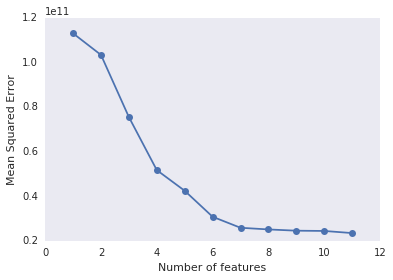

In [30]:
from sklearn.base import clone
from itertools import combinations
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, median_absolute_error, mean_squared_error

# clase para hacer Backward Selection
class SBS():
    def __init__(self, estimator, k_features,
        scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
        
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
        random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train,
        X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train,
                X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    
    def transform(self, X):
        return X[:, self.indices_]
        
    def _calc_score(self, X_train, y_train,
                        X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score

# aplicamos algoritmos
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5, weights='distance')
sbs = SBS(knn, k_features=1, scoring=mean_squared_error)
sbs.fit(X_train_std, y_train)

# graficamos
k_feat = [len(k) for k in sbs.subsets_]
plot(k_feat, sbs.scores_, marker='o')
#ylim([0.0, 1.1])
ylabel('Mean Squared Error')
xlabel('Number of features')
grid()
show()

Observamos que el RMSE disminuye a medida que aumentamos la cantidad de features. No parece necesario disminuir la cantidad de features a menos que sea por temas de performance.

In [31]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

# busqueda de hiper-parametros
k_scores = []
k_list = []

best_score = float("inf")

print('Buscando k optimo .',end='')
for i in [10,20,30,40,60,70,80,90,100]:
    print('.',end='')
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(X_train_std, y_train)

    k_list.append(i)
    
    y_predict = knn.predict(X_test_std)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    k_scores.append(sc)

    if(sc < best_score):
        best_score = sc
        best_k = i
        print("")
        print("score=",best_score,"k=",best_k)
        
print("El k optimo parece estar cerca de",best_k)

Buscando k optimo ..
score= 223722.4035061741 k= 10
.
score= 220387.6993613128 k= 20
.
score= 220068.00637817345 k= 30
......El k optimo parece estar cerca de 30


In [32]:
# buscamos alrededor del 10
print('Buscando k optimo .',end='')
range_start = best_k - 5
range_end = best_k + 5
for i in range(range_start, range_end, 1):
    print('.',end='')
    knn = KNeighborsRegressor(n_neighbors=i, weights='distance', n_jobs=-1)
    knn.fit(X_train_std, y_train)

    k_list.append(i)
    
    y_predict = knn.predict(X_test_std)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    k_scores.append(sc)

    if(sc < best_score):
        best_score = sc
        best_k = i
        print("")
        print("score=",best_score,"k=",best_k)
        
print("El k optimo parece estar cerca de",best_k)

Buscando k optimo ...
score= 220003.37918159607 k= 26
........El k optimo parece estar cerca de 26


In [33]:
p_list = []
print('Buscando p optimo .',end='')
for p in [100,81,77,66,50,43,30,25,14,9,2]:
    print('.',end='')
    knn = KNeighborsRegressor(n_neighbors=best_k, p=p, weights='distance', n_jobs=-1)
    knn.fit(X_train_std, y_train)

    p_list.append(i)
    
    y_predict = knn.predict(X_test_std)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    k_scores.append(sc)

    if(sc < best_score):
        best_score = sc
        best_p = p
        print("")
        print("score=",best_score,"p=",best_p)
        
print("El p optimo parece estar cerca de",best_p)

Buscando p optimo ............El p optimo parece estar cerca de 2


In [34]:
# entrenamos el modelo
model_knn = KNeighborsRegressor(n_neighbors=best_k, weights='distance', p=best_p, n_jobs=-1)
model_knn.fit(X_train_std, y_train)

y_predict = model_knn.predict(X_train_std)
print("Error del set de entrenamiento",sqrt(mean_squared_error(y_predict,y_train)))

y_predict = model_knn.predict(X_test_std)
print("Error del set de test",sqrt(mean_squared_error(y_predict,y_test)))


Error del set de entrenamiento 32826.430387409986
Error del set de test 220003.37918159607


## Algoritmo II: Random Forest

### RF con datos no-normalizados

In [35]:
best_max_depth = 5
best_min_samples_leaf = 5
best_min_samples_split = 10

In [36]:
from time import time
from sklearn.ensemble import RandomForestRegressor

# calculo el tiempo que tarda un knn
start_time = time()

rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split)
rf1.fit(X_train_std, y_train.ravel())

train_time = time() - start_time
print("Transcurrieron: %0.2f segundos de entrenamiento" % train_time)

y_predict = rf1.predict(X_test_std)

predict_time = time() - start_time - train_time
print("Transcurrieron: %0.2f segundos de predicción" % predict_time)

Transcurrieron: 13.19 segundos de entrenamiento
Transcurrieron: 0.07 segundos de predicción


Primero fijo min leaf y min samples split y busco el max depth

In [37]:
best_score = float("inf")

print('Buscando max_depth optimo .',end='')
for i in [10,20,30,40,60,70,80,90,100,110,120,130,140]:
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=i,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_max_depth = i
        print("")
        print("score=",best_score,"max_depth=",best_max_depth)
        
print("El max_depth optimo parece estar cerca de",best_max_depth)

Buscando max_depth optimo ..
score= 204730.0019477595 max_depth= 10
.
score= 194262.23753979258 max_depth= 20
.
score= 194068.67913295468 max_depth= 30
.
score= 193569.22289046555 max_depth= 40
.
score= 193120.98427735892 max_depth= 60
........El max_depth optimo parece estar cerca de 60


In [38]:
print('Buscando max_depth optimo .',end='')

start_range = best_max_depth - 6
end_range = best_max_depth + 6
for i in range(start_range,end_range,1):
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=i,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_max_depth = i
        print("")
        print("score=",best_score,"max_depth=",best_max_depth)
        
print("El max_depth optimo parece estar cerca de",best_max_depth)

Buscando max_depth optimo .....
score= 192818.95436076893 max_depth= 57
........El max_depth optimo parece estar cerca de 57


Fijado el max_depth ahora iteramos sobre el min leaf

In [39]:
print('Buscando min_samples_leaf optimo .',end='')
for i in [5,10,15,20,25,30,35,40]:
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=i, min_samples_split=best_min_samples_split, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_min_samples_leaf = i
        print("")
        print("score=",best_score,"min_samples_leaf=",best_min_samples_leaf)
        
print("El min_samples_leaf optimo parece estar cerca de",best_min_samples_leaf)

Buscando min_samples_leaf optimo .........El min_samples_leaf optimo parece estar cerca de 5


In [40]:
start_range = best_min_samples_leaf - 4
end_range = best_min_samples_leaf + 4

print('Buscando min_samples_leaf optimo .',end='')
for i in range(start_range,end_range,1):
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=i, min_samples_split=best_min_samples_split, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_min_samples_leaf = i
        print("")
        print("score=",best_score,"min_samples_leaf=",best_min_samples_leaf)
        
print("El min_samples_leaf optimo parece estar cerca de",best_min_samples_leaf)

Buscando min_samples_leaf optimo ..
score= 188724.57369693517 min_samples_leaf= 1
.......El min_samples_leaf optimo parece estar cerca de 1


In [41]:
print('Buscando min_samples_split optimo .',end='')
for i in [5,10,15,20,25,30,35,40]:
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=i, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_min_samples_leaf = i
        print("")
        print("score=",best_score,"min_samples_split=",best_min_samples_split)
        
print("El min_samples_split optimo parece estar cerca de",best_min_samples_split)

Buscando min_samples_split optimo ..
score= 186412.56347241113 min_samples_split= 10
.......El min_samples_split optimo parece estar cerca de 10


In [42]:
start_range = best_min_samples_split - 4
end_range = best_min_samples_split + 4

print('Buscando min_samples_split optimo .',end='')
for i in range(start_range,end_range,1):
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=100, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=i, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_min_samples_leaf = i
        print("")
        print("score=",best_score,"min_samples_split=",best_min_samples_split)
        
print("El min_samples_split optimo parece estar cerca de",best_min_samples_split)

Buscando min_samples_split optimo .........El min_samples_split optimo parece estar cerca de 10


Por ultima vamos a ir aumentando los estimadores para mejorar la precisiones tratando de ver si mejoran o no los resultados. Esperamos que mientras mas estimadores tengamos, mejores seran los resultados

In [43]:
best_estimators = 100

print('Aumentando la cantidad de estimadores .',end='')
for i in [100,200,300,400,500,600,700,800,900,1000]:
    print('.',end='')
    rf1 = RandomForestRegressor(n_estimators=i, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_jobs=-1)
    rf1.fit(X_train, y_train.ravel())
    
    y_predict = rf1.predict(X_test)
    sc = sqrt(mean_squared_error(y_predict,y_test))

    if(sc < best_score):
        best_score = sc
        best_estimators = i
        print("")
        print("score=",best_score,"best_estimators=",best_estimators)
        
print("La cantidad de estimadores que mejor resultados nos dio fue",best_estimators)

Aumentando la cantidad de estimadores ...........La cantidad de estimadores que mejor resultados nos dio fue 100


In [44]:
# entrenamos el modelo
model_rf1 = RandomForestRegressor(n_estimators=best_estimators, max_features='auto', max_depth=best_max_depth,\
                           min_samples_leaf=best_min_samples_leaf, min_samples_split=best_min_samples_split, n_jobs=-1)
model_rf1.fit(X_train, y_train.ravel())

y_predict = model_rf1.predict(X_train)
print("Error del set de entrenamiento",sqrt(mean_squared_error(y_predict,y_train)))

y_predict = model_rf1.predict(X_test)
print("Error del set de test",sqrt(mean_squared_error(y_predict,y_test)))

Error del set de entrenamiento 103637.05030992422
Error del set de test 193246.23918219376


## ENSAMBLE

### Levantar set de test

In [45]:
# leemos set de test
test_df = pd.read_csv('../data/test/properati_dataset_testing_noprice.csv', low_memory=False)
test_df.head()

,id,created_on,property_type,operation,place_name,place_with_parent_names,country_name,state_name,lat-lon,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses,description
0,3632,2017-08-24,departamento,venta,Puerto Madero,|Argentina|Capital Federal|Puerto Madero|,Argentina,Capital Federal,"-34.6109877599,-58.3634635778",-34.610988,-58.363464,0.0,NaN,NaN,NaN,NaN,Edificio BA Houses situado frente al Dique 3 d...
1,3633,2017-08-25,departamento,venta,Buenos Aires Interior,|Argentina|Buenos Aires Interior|,Argentina,Buenos Aires Interior,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,El departamento cuenta con un living-comedor a...
2,2263404,2017-08-01,departamento,venta,Palermo Soho,|Argentina|Capital Federal|Palermo|Palermo Soho|,Argentina,Capital Federal,"-34.5893633232,-58.4128798588",-34.589363,-58.412880,53.0,48.0,NaN,NaN,1500,IMPECABLE TORRE COY III – DEPA...
3,2263405,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,39.0,39.0,NaN,NaN,NaN,AMBIENTE DIVISIBLE CON PISOS D...
4,2263406,2017-08-01,departamento,venta,Chacarita,|Argentina|Capital Federal|Chacarita|,Argentina,Capital Federal,NaN,NaN,NaN,51.0,51.0,NaN,NaN,NaN,LIVING COMEDOR CON PISOS DE PO...


In [46]:
# nos quedamos con las columnas con las que entrenamos el modelo
test_predcit_df = test_df.loc[:,columns]
test_predcit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14166 entries, 0 to 14165
Data columns (total 11 columns):
created_on               14166 non-null object
property_type            14166 non-null object
place_name               14166 non-null object
state_name               14166 non-null object
lat                      10487 non-null float64
lon                      10487 non-null float64
surface_total_in_m2      11853 non-null float64
surface_covered_in_m2    13005 non-null float64
floor                    1368 non-null float64
rooms                    7500 non-null float64
expenses                 2543 non-null object
dtypes: float64(6), object(5)
memory usage: 1.2+ MB


In [47]:
# completamos los nulos
test_predcit_df['floor'] = test_predcit_df[['floor']].fillna(0)
test_predcit_df['rooms'] = test_predcit_df[['rooms']].fillna(0)

test_predcit_df[['floor','rooms']].describe()

,floor,rooms
count,14166.000000,14166.000000
mean,1.031272,1.484893
std,29.206664,1.742398
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,1.000000
75%,0.000000,3.000000
max,2509.000000,21.000000


In [48]:
test_predcit_df['expenses'] = test_predcit_df[['expenses']].fillna(0)
test_predcit_df[~test_predcit_df['expenses'].astype(str).str.isdigit()]['expenses']

280                   SI
282                   NO
363                $1500
600               $16000
639                $1980
1340              $19000
4520       $ 2400 aprox.
6625              $25900
6652              20.622
6654                 8.5
6655                 8.3
6662                13.5
6664                 8.2
6665               15.47
6667                 6.5
6669              11.489
6670                15.5
6671                 8.5
6673                 7.8
6675                 4.2
6681                $650
6682                 7.6
6685                14.5
7623               $ 300
8078               $1980
8539           2000/2500
9960        Sin expensas
10978                 NO
10987                 SI
10989                 NO
11054    5750 + 4000 ext
11097        $ 600 aprox
11250                1.3
12000                4.5
13329       Sin expensas
13989              $1200
13993                1.9
Name: expenses, dtype: object

In [49]:
import re

re.sub('(\$+)','', "12000")

'12000'

In [50]:
def to_numeric(x):
    replacement = x
    try:
        replacement = re.sub('(\$+)','', replacement)
        replacement = re.sub('aprox','', replacement)
        replacement = re.sub('Sin expensas','', replacement)
        replacement = re.sub('NO','0', replacement)
        replacement = re.sub('SI','0', replacement)
        replacement = re.sub('(\.+)','', replacement)
        replacement = re.sub(' ','', replacement)
        replacement = re.sub('\/.*$','', replacement)
        replacement = re.sub('\+.*$','', replacement)
    except:
        return x
    return replacement
    
test_predcit_df['expenses'] = test_predcit_df['expenses'].apply(to_numeric)
test_predcit_df['expenses'] = test_predcit_df[['expenses']].fillna(0)
test_predcit_df[~test_predcit_df['expenses'].astype(str).str.isdigit()]['expenses']

9960     
13329    
Name: expenses, dtype: object

In [51]:
test_predcit_df['expenses'] = pd.to_numeric(test_predcit_df['expenses'])
test_predcit_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,2017-08-24,departamento,Puerto Madero,Capital Federal,-34.610988,-58.363464,0.0,NaN,0.0,0.0,0.0
1,2017-08-25,departamento,Buenos Aires Interior,Buenos Aires Interior,NaN,NaN,0.0,NaN,0.0,0.0,0.0
2,2017-08-01,departamento,Palermo Soho,Capital Federal,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,2017-08-01,departamento,Chacarita,Capital Federal,NaN,NaN,39.0,39.0,0.0,0.0,0.0
4,2017-08-01,departamento,Chacarita,Capital Federal,NaN,NaN,51.0,51.0,0.0,0.0,0.0


In [52]:
test_predcit_df['state_name'].value_counts()

Capital Federal             8847
Bs.As. G.B.A. Zona Oeste    3101
Bs.As. G.B.A. Zona Sur      2215
Bs.As. G.B.A. Zona Norte       2
Buenos Aires Interior          1
Name: state_name, dtype: int64

In [53]:
def convert_state_name(x):
    name = str(x)
    if('Capital Federal' in x):
        return 3
    if('Zona Norte' in x):
        return 0
    if('Zona Sur' in x):
        return 2
    if('Zona Oeste' in x):
        return 1
    return 4

test_predcit_df['state_name'] = test_predcit_df.state_name.apply(convert_state_name)
test_predcit_df['state_name'].value_counts()

3    8847
1    3101
2    2215
0       2
4       1
Name: state_name, dtype: int64

In [54]:
test_predcit_df['place_name'].value_counts()

Palermo                     1020
Belgrano                     783
Caballito                    650
La Plata                     603
Recoleta                     556
Ituzaingó                    547
Ramos Mejía                  394
Morón                        393
Almagro                      376
Castelar                     345
Villa Crespo                 329
Flores                       329
Balvanera                    327
Villa Urquiza                309
Nuñez                        300
Barrio Norte                 276
Capital Federal              247
Monserrat                    221
Saavedra                     211
San Telmo                    207
Lomas de Zamora              197
Quilmes                      178
Moreno                       171
Palermo Hollywood            164
Puerto Madero                155
Banfield                     134
Haedo                        126
Villa Devoto                 123
Colegiales                   113
Lanús                        113
          

In [55]:
test_predcit_df['place_name'] = encoder_place_name.fit_transform(test_predcit_df['place_name'])
test_predcit_df['place_name'].value_counts()

133    1020
20      783
31      650
96      603
157     556
92      547
155     394
129     393
7       376
37      345
196     329
73      329
12      327
218     309
130     300
17      276
34      247
124     221
160     211
168     207
110     197
153     178
128     171
135     164
152     155
13      134
85      126
197     123
101     113
47      113
       ... 
175       1
70        1
56        1
126       1
150       1
55        1
15        1
80        1
222       1
26        1
9         1
77        1
99        1
2         1
50        1
114       1
154       1
162       1
194       1
105       1
65        1
29        1
207       1
116       1
164       1
18        1
172       1
212       1
5         1
0         1
Name: place_name, dtype: int64

In [56]:
test_predcit_df['surface_total_in_m2'] = test_predcit_df[['surface_total_in_m2']].fillna(0)
test_predcit_df['surface_covered_in_m2'] = test_predcit_df[['surface_covered_in_m2']].fillna(0)
test_predcit_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,2017-08-24,departamento,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,2017-08-25,departamento,29,4,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,2017-08-01,departamento,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,2017-08-01,departamento,40,3,NaN,NaN,39.0,39.0,0.0,0.0,0.0
4,2017-08-01,departamento,40,3,NaN,NaN,51.0,51.0,0.0,0.0,0.0


In [57]:
test_predcit_df['property_type'].value_counts()

departamento    9761
casa            3409
ph               996
Name: property_type, dtype: int64

In [58]:

def convert_property_type(x):
    if('departamento' in x):
        return 1
    if('casa' in x):
        return 2
    if('ph' in x):
        return 0
    return 3

test_predcit_df['property_type'] = test_predcit_df.property_type.apply(convert_property_type)
test_predcit_df['property_type'].value_counts()

1    9761
2    3409
0     996
Name: property_type, dtype: int64

In [59]:
test_predcit_df['created_on'] = test_predcit_df['created_on'].str.replace('-','').apply(int)
test_predcit_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,20170824,1,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,20170825,1,29,4,NaN,NaN,0.0,0.0,0.0,0.0,0.0
2,20170801,1,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,20170801,1,40,3,NaN,NaN,39.0,39.0,0.0,0.0,0.0
4,20170801,1,40,3,NaN,NaN,51.0,51.0,0.0,0.0,0.0


Claramente hay que mejorar el tema de los lat y lon nulos. Por ahora solo asigno un promedio

In [60]:
from sklearn.preprocessing import Imputer
imputer_mean = Imputer(missing_values='NaN', strategy='mean', axis=0)

test_predcit_df["lat"] = imputer_mean.fit_transform(test_predcit_df[["lat"]])
test_predcit_df["lon"] = imputer_mean.fit_transform(test_predcit_df[["lon"]])

test_predcit_df.head()

,created_on,property_type,place_name,state_name,lat,lon,surface_total_in_m2,surface_covered_in_m2,floor,rooms,expenses
0,20170824,1,152,3,-34.610988,-58.363464,0.0,0.0,0.0,0.0,0.0
1,20170825,1,29,4,-34.629923,-58.465820,0.0,0.0,0.0,0.0,0.0
2,20170801,1,136,3,-34.589363,-58.412880,53.0,48.0,0.0,0.0,1500.0
3,20170801,1,40,3,-34.629923,-58.465820,39.0,39.0,0.0,0.0,0.0
4,20170801,1,40,3,-34.629923,-58.465820,51.0,51.0,0.0,0.0,0.0


In [61]:
test_predcit_df['expenses'] = test_predcit_df[['expenses']].fillna(0)

stdsc_prediction = StandardScaler()
X_test_std_df = stdsc_prediction.fit_transform(test_predcit_df)
X_test_std_df

array([[  1.24258347e+00,  -3.20797510e-01,   7.82855685e-01, ...,
         -3.53107240e-02,  -8.52242370e-01,  -1.88583144e-02],
       [  1.36710992e+00,  -3.20797510e-01,  -1.17649092e+00, ...,
         -3.53107240e-02,  -8.52242370e-01,  -1.88583144e-02],
       [ -1.62152505e+00,  -3.20797510e-01,   5.27981330e-01, ...,
         -3.53107240e-02,  -8.52242370e-01,  -3.19255009e-04],
       ..., 
       [ -1.62152505e+00,   1.56250855e+00,   1.13810503e-01, ...,
         -3.53107240e-02,  -8.52242370e-01,  -1.88583144e-02],
       [  1.36710992e+00,  -3.20797510e-01,  -1.31985774e+00, ...,
         -3.53107240e-02,  -8.52242370e-01,   3.21611770e-02],
       [ -2.51734022e-01,   1.56250855e+00,  -9.69405505e-01, ...,
         -3.53107240e-02,   1.44352476e+00,  -1.88583144e-02]])

### Predecir y ensamblar

In [62]:
y_knn = model_knn.predict(X_test_std_df)
y_rf1 = model_rf1.predict(test_predcit_df)

In [63]:
print(y_knn)
print(y_rf1)

[[ 285537.26556421]
 [ 239084.88037953]
 [ 274566.50487766]
 ..., 
 [ 128511.58032552]
 [ 320008.60506712]
 [ 154685.17676239]]
[ 476888.06802274   79593.00153088  167729.61641183 ...,  177178.15945608
  193058.75047926  164553.42950258]


Tener en cuenta para el ensamble cuales fueron los RMSE de cada algoritmo asi le damos un peso acorde a los errores de cada modelo

In [64]:
# ensamble
C1 = 0.2
C2 = 0.8

y_final = []
for row1,row2 in zip(y_knn,y_rf1):
    y_final.append((C1 * float(row1) + C2 * float(row2)) )

In [65]:
print(y_final)

[438617.9075310357, 111491.37730061161, 189096.99410499242, 106989.22063653608, 125344.31875655644, 106989.22063653608, 106989.22063653608, 106989.22063653608, 189897.77416785245, 144702.8733855302, 144702.8733855302, 144702.8733855302, 149988.67184024712, 600478.050527563, 96596.32477442647, 96596.32477442647, 96596.32477442647, 96596.32477442647, 96596.32477442647, 96596.32477442647, 96596.32477442647, 96596.32477442647, 108085.9740564074, 115897.91143876084, 115897.91143876084, 115897.91143876084, 115897.91143876084, 96596.32477442647, 96596.32477442647, 103895.0187783877, 103895.0187783877, 103895.0187783877, 103895.0187783877, 103895.0187783877, 96596.32477442647, 103895.0187783877, 103895.0187783877, 96596.32477442647, 96596.32477442647, 96596.32477442647, 96596.32477442647, 266398.5386513115, 111515.74357590114, 149988.67184024712, 149988.67184024712, 119963.52478172147, 114592.58749290992, 139941.99265060865, 132720.87438124328, 290601.4618970262, 283908.89380386635, 292612.897

In [70]:
# escribir al archivo
output = pd.DataFrame( data={"id":test_df["id"], "price_usd":y_final} )
output.to_csv( "../data/result/RESULTADO_FINAL_"+str(now)+".csv", index=False, quoting=3 )

In [71]:
notebook_time = time() - start_notebook_time
notebook_time = notebook_time/60
print("Minutos totales del notebook: %0.2f " % notebook_time)

Minutos totales del notebook: 48.58 
